In [1]:
import tkinter as tk
import numpy as np # thư viện tính toán toán học
import seaborn as sns
import matplotlib.pyplot as plt # visualize data sử dụng đồ thị
sns.set(color_codes = True)
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách
import pandas as pd 
import math as m 
import csv
import random
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler


num_cluster = 5

In [2]:
df=pd.read_csv("C:\\Users\\LENOVO\Downloads\\StudentsPerformance.csv", index_col=0)
""" df=pd.read_csv("C:\\Users\\LENOVO\Downloads\\dataset.csv", index_col=0) """

' df=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\dataset.csv", index_col=0) '

In [3]:
df

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...
female,group E,master's degree,standard,completed,88,99,95
male,group C,high school,free/reduced,none,62,55,55
female,group C,high school,free/reduced,completed,59,71,65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, female to female
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   race/ethnicity               1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
def R_squared(data_set, labels, number_of_cluster):
  totalSum = 0
  clusters = [[] for i in range(number_of_cluster)]
  for index in range(len(data_set)):
    clusters[labels[index]].append(data_set[index])

  for i in range(number_of_cluster):
    avg = np.mean(clusters[i], 0)
    sum = 0
    for x in range(len(clusters[i])):
      sum = sum + np.square(np.linalg.norm(np.array(clusters[i][x]) - np.array(avg)))

    totalSum = totalSum + sum

  avg = np.mean(data_set, 0)

  sum = 0
  for i in range(len(data_set)):
    sum = sum + np.square(np.linalg.norm(np.array(data_set[i]) - np.array(avg)))

  return (sum - totalSum) / sum

In [7]:
def RMSSTD(data_set, labels, number_of_cluster):
  totalSum = 0
  totalCount = 0
  clusters = [[] for i in range(number_of_cluster)]
  for index in range(len(data_set)):
    clusters[labels[index]].append(data_set[index])

  for i in range(number_of_cluster):
    avg = np.mean(clusters[i], 0)
    sum = 0
    for x in range(len(clusters[i])):
      sum = sum + np.square(np.linalg.norm(np.array(clusters[i][x]) - np.array(avg)))

    totalSum = totalSum + sum

  totalCount = len(data_set) - number_of_cluster
  P = len(data_set[0])
  return np.sqrt(totalSum/(P * totalCount))

In [8]:
#Dunn index
import numpy as np
from sklearn.preprocessing import LabelEncoder

DIAMETER_METHODS = ['mean_cluster', 'farthest']
CLUSTER_DISTANCE_METHODS = ['nearest', 'farthest']


def inter_cluster_distances(labels, distances, method='nearest'):
    if method not in CLUSTER_DISTANCE_METHODS:
        raise ValueError(
            'method must be one of {}'.format(CLUSTER_DISTANCE_METHODS))

    if method == 'nearest':
        return __cluster_distances_by_points(labels, distances)
    elif method == 'farthest':
        return __cluster_distances_by_points(labels, distances, farthest=True)


def __cluster_distances_by_points(labels, distances, farthest=False):
    n_unique_labels = len(np.unique(labels))
    cluster_distances = np.full((n_unique_labels, n_unique_labels),
                                float('inf') if not farthest else 0)

    np.fill_diagonal(cluster_distances, 0)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i, len(labels)):
            if labels[i] != labels[ii] and (
                (not farthest and
                 distances[i, ii] < cluster_distances[labels[i], labels[ii]])
                    or
                (farthest and
                 distances[i, ii] > cluster_distances[labels[i], labels[ii]])):
                cluster_distances[labels[i], labels[ii]] = cluster_distances[
                    labels[ii], labels[i]] = distances[i, ii]
    return cluster_distances


def diameter(labels, distances, method='farthest'):
    if method not in DIAMETER_METHODS:
        raise ValueError('method must be one of {}'.format(DIAMETER_METHODS))

    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    if method == 'mean_cluster':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii]:
                    diameters[labels[i]] += distances[i, ii]

        for i in range(len(diameters)):
            diameters[i] /= sum(labels == i)

    elif method == 'farthest':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii] and distances[i, ii] > diameters[
                        labels[i]]:
                    diameters[labels[i]] = distances[i, ii]
    return diameters

def dunn(labels, your_dataset, diameter_method='farthest', cdist_method='nearest'):
    distances = pairwise_distances(your_dataset)
    labels = LabelEncoder().fit(labels).transform(labels)

    ic_distances = inter_cluster_distances(labels, distances, cdist_method)
    min_distance = min(ic_distances[ic_distances.nonzero()])
    max_diameter = max(diameter(labels, distances, diameter_method))

    return min_distance / max_diameter

In [9]:
#visualize
def plot_data(data_set, labels, number_of_cluster, centers, i=0, j=2):
    color_list = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#17becf", "#e377c2", "#bcbd22", "#7f7f7f"]
    x_points = [[] for x in range(number_of_cluster)]
    y_points = [[] for x in range(number_of_cluster)]
    x_centers = []
    y_centers = []

    for x in range(number_of_cluster):
        x_centers.append(centers[x][i])
        y_centers.append(centers[x][j])

    for index in range(len(data_set)):
        x_points[labels[index]].append(data_set[index][i])
        y_points[labels[index]].append(data_set[index][j])

    for x in range(number_of_cluster):
        plt.plot(x_points[x], y_points[x], '.', color=color_list[x])

    plt.plot(x_centers, y_centers, '.', color="black")
    plt.show()

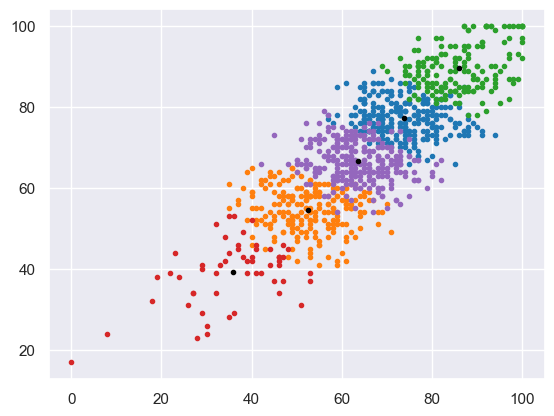

In [10]:
df_ = df.to_numpy()
df_ = np.delete(df_, 3, 1)
df_ = np.delete(df_, 2, 1)
df_ = np.delete(df_, 1, 1)
df_ = np.delete(df_, 0, 1)
kmeans=KMeans(n_clusters=num_cluster)
kmeans.fit(df_)
plot_data(df_, kmeans.labels_, num_cluster, kmeans.cluster_centers_, 0, 1)

In [11]:
#default
print(davies_bouldin_score(df_, kmeans.labels_))    #small
print(RMSSTD(df_, kmeans.labels_, num_cluster))
print(dunn(kmeans.labels_, df_))                    #great
print(R_squared(df_, kmeans.labels_, num_cluster))
print(silhouette_score(df_, kmeans.labels_))

0.9287556890768366
6.10652952516813
0.015600263334667653
0.834684854017112
0.3329151682662219


In [12]:
def normalize_data(data_set):
  for j in range(0, len(data_set[0])):
    col_max = np.max(np.array(data_set)[:,j])
    for i in range(0, len(data_set)):
      data_set[i][j] = data_set[i][j] / col_max

  return data_set

scalar = MinMaxScaler()
df_normalized = scalar.fit_transform(df_)
df_normalized


array([[0.72      , 0.6626506 , 0.71111111],
       [0.69      , 0.87951807, 0.86666667],
       [0.9       , 0.93975904, 0.92222222],
       ...,
       [0.59      , 0.65060241, 0.61111111],
       [0.68      , 0.73493976, 0.74444444],
       [0.77      , 0.8313253 , 0.84444444]])

In [13]:
kmeans=KMeans(n_clusters=num_cluster)
kmeans.fit(df_normalized)
#plot_data(df_normalized, kmeans.labels_, num_cluster, kmeans.cluster_centers_, 5, 7)

KMeans(n_clusters=5)

In [14]:
#after normalizing
print(davies_bouldin_score(df_normalized, kmeans.labels_))      #small
print(RMSSTD(df_normalized, kmeans.labels_, num_cluster))
print(dunn(kmeans.labels_, df_normalized))                      #great
print(R_squared(df_normalized, kmeans.labels_, num_cluster))    
print(silhouette_score(df_normalized, kmeans.labels_))    


0.9162537185705826
0.06583904374897948
0.02149331711551241
0.8428922542257856
0.33825870669867025


0 1


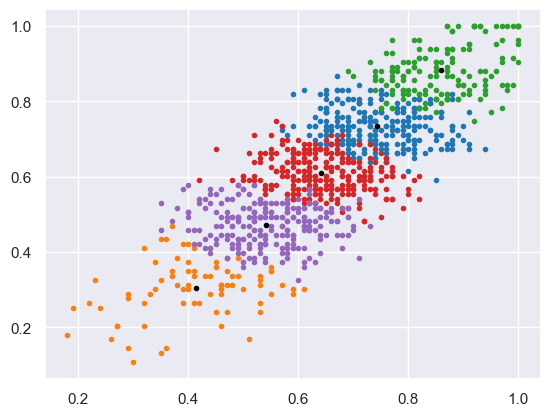

0 2


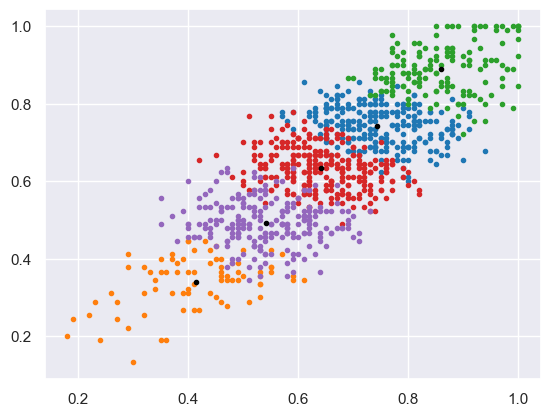

1 2


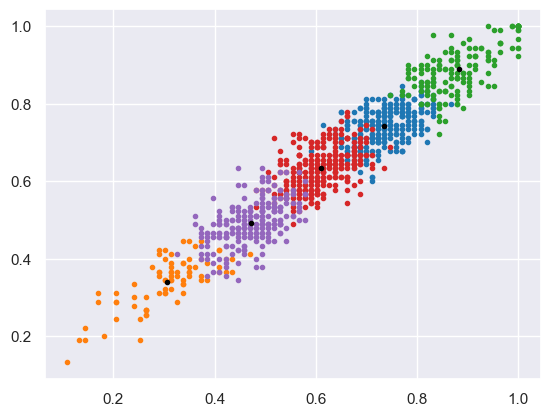

In [15]:
import sys
def outlier_removal(data_set):
  distances = pairwise_distances(data_set)
  max = 0
  min = sys.maxsize
  n = len(data_set)
  for i in range(n):
    for j in range(i + 1, n):
      if min > distances[i][j]:
        min = distances[i][j]
      if max < distances[i][j]:
        max = distances[i][j]
  threshold = (max + min) / 2

  sum = [0] * len(data_set[0])
  for i in range(len(data_set)):
    sum = np.add(sum, data_set[i])
  center = np.array(sum) / len(data_set)

  result = []
  for i in range(len(data_set)):
    if (np.linalg.norm(np.array(center) - np.array(data_set[i])) < threshold):
      result.append(data_set[i])

  return result

df_removed = outlier_removal(df_normalized)
kmeans=KMeans(n_clusters=num_cluster)
kmeans.fit(df_removed)
for i in range(0, len(df_removed[0])):
  for j in range(i + 1, len(df_removed[0])):
    print(i, j)
    plot_data(df_removed, kmeans.labels_, num_cluster, kmeans.cluster_centers_, i, j)

In [16]:
#after normalizing and removing
print(davies_bouldin_score(df_removed, kmeans.labels_))      #small
print(RMSSTD(df_removed, kmeans.labels_, num_cluster))
print(dunn(kmeans.labels_, df_removed))                      #great
print(R_squared(df_removed, kmeans.labels_, num_cluster)) 
print(silhouette_score(df_removed, kmeans.labels_)) 


0.9243561284156503
0.06394464579782927
0.03184997919405938
0.845511152487238
0.3353699842414741


In [17]:
def cluster_outlier_removal(data_set, labels, number_of_cluster):
  distances = pairwise_distances(data_set)
  clusters = [[] for x in range(number_of_cluster)]

  for index in range(len(data_set)):
    clusters[labels[index]].append(data_set[index])

  result = []
  for i in range(number_of_cluster):
    max = 0
    min = sys.maxsize
    n = len(clusters[i])
    for i in range(n):
      for j in range(i + 1, n):
        if min > distances[i][j]:
          min = distances[i][j]
        if max < distances[i][j]:
          max = distances[i][j]
    threshold = (max + min) / 2

    sum = [0] * len(data_set[0])
    for index in range(len(clusters[i])):
      np.add(sum, clusters[i][index])
    center = np.array(sum) / len(clusters[i])

    cluster_result = []
    for index in range(len(clusters[i])):
      if (np.linalg.norm(np.array(center) - np.array(clusters[i][index])) < threshold):
        cluster_result.append(clusters[i][index])

    result.extend(cluster_result)

  return result

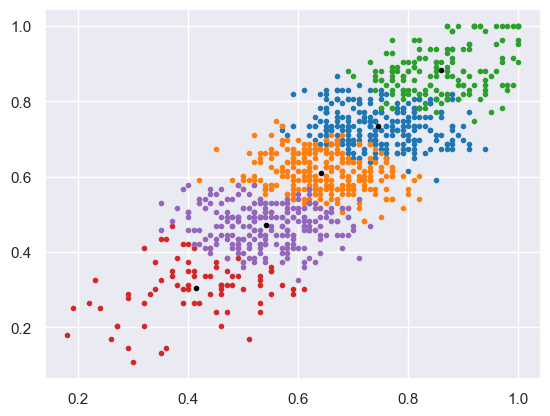

In [18]:
df_removed2 = outlier_removal(df_normalized)
kmeans=KMeans(n_clusters=num_cluster)
kmeans.fit(df_removed2)
plot_data(df_removed2, kmeans.labels_, num_cluster, kmeans.cluster_centers_, 0, 1)

In [19]:
#after normalizing and removing 2
print(davies_bouldin_score(df_removed2, kmeans.labels_))      #small
print(RMSSTD(df_removed2, kmeans.labels_, num_cluster))
print(dunn(kmeans.labels_, df_removed2))                      #great
print(R_squared(df_removed2, kmeans.labels_, num_cluster)) 
print(silhouette_score(df_removed, kmeans.labels_)) 


0.9247593517734446
0.06394429406836631
0.03184997919405938
0.8455128520237434
0.3352708410094426


In [20]:
kmeans.cluster_centers_

array([[0.74494382, 0.73570687, 0.7429047 ],
       [0.64245487, 0.60971685, 0.633213  ],
       [0.86046053, 0.88316424, 0.88881579],
       [0.41397436, 0.3059932 , 0.33917379],
       [0.54184685, 0.47237599, 0.49294294]])

In [21]:
kmeans.n_iter_

30